##  Imports & Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Set Plot Style
sns.set_theme(style="whitegrid", palette="pastel")

# Load Data (Adjust path to go up one level from 'notebooks' to 'data')
df = pd.read_csv("../data/processed/reviews_analyzed.csv")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"Data Loaded: {df.shape[0]} rows")
df.head()

Data Loaded: 1785 rows


,review,rating,date,bank,source,sentiment_label,sentiment_score,identified_theme
0,CBE ይለያል።,5,2025-11-29,CBE,Google Play,POSITIVE,0.988648,General
1,it's special for me,5,2025-11-29,CBE,Google Play,POSITIVE,0.999820,General
2,Make it user friendly.,2,2025-11-29,CBE,Google Play,POSITIVE,0.992062,General
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play,NEGATIVE,0.987553,General
4,good app,5,2025-11-28,CBE,Google Play,POSITIVE,0.999849,General


## Overall Sentiment Overview

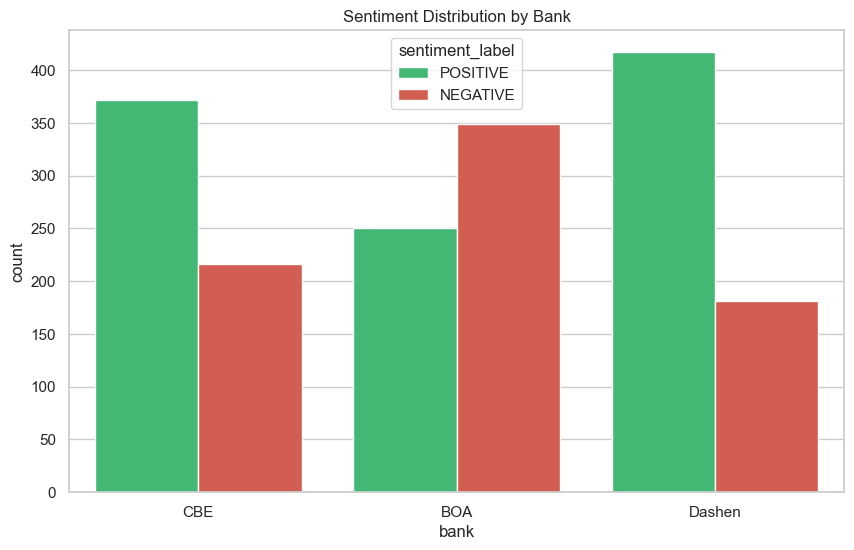

bank    sentiment_label
BOA     NEGATIVE           349
        POSITIVE           250
CBE     NEGATIVE           216
        POSITIVE           372
Dashen  NEGATIVE           181
        POSITIVE           417
dtype: int64


In [3]:
# Visualize Sentiment Counts per Bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank', hue='sentiment_label', palette={'POSITIVE': '#2ecc71', 'NEGATIVE': '#e74c3c'})
plt.title("Sentiment Distribution by Bank")
plt.show()

# Print exact numbers
print(df.groupby(['bank', 'sentiment_label']).size())

##  Scenario 1 - Retaining Users (Speed Issues)
The prompt asks: "Users complain about slow loading... Analyze if this is a broader issue."

C:\Users\DELL 7020\AppData\Local\Temp\ipykernel_14172\3171307660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=speed_issues, x='bank', palette="Reds_d")


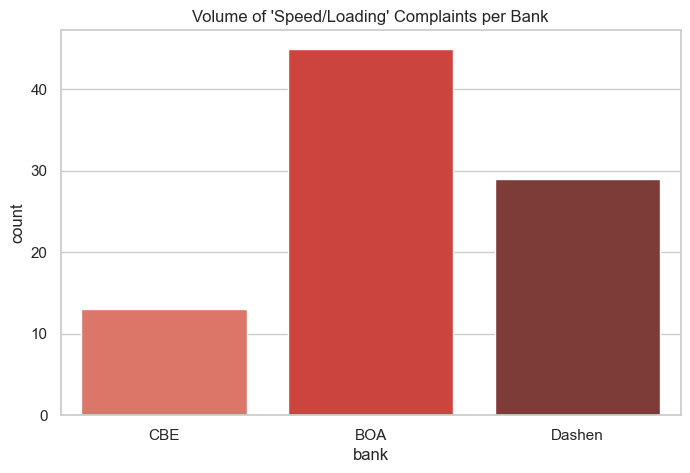

Examples of Speed Complaints (BOA):
['not user friendly at all it requires a huge connectivity and also lags many times 😑😑😑'
 'the lag is unbelievable when you need it the most this suks'
 'when trying to activate the app it keeps on loading on the security questions page. It has been two days'
 'I would like to share feedback regarding the application. It frequently experiences disruptions and does not function properly, often freezing or failing to load. This issue is affecting workflow and efficiency. Kindly review and address this problem to ensure smoother performance.'
 "i m sorry but it doesn't work for my android it is too slow but other bank are very fast please update"]


In [4]:
# Filter for reviews mentioning "slow", "lag", or "loading"
speed_issues = df[df['review'].str.contains("slow|lag|load|wait|stuck", case=False, na=False)]

# Count how many speed complaints per bank
plt.figure(figsize=(8, 5))
sns.countplot(data=speed_issues, x='bank', palette="Reds_d")
plt.title("Volume of 'Speed/Loading' Complaints per Bank")
plt.show()

# Read some actual examples for CBE or BOA
print("Examples of Speed Complaints (BOA):")
print(speed_issues[speed_issues['bank'] == 'BOA']['review'].head(5).values)

## Scenario 2 - Enhancing Features
The prompt asks: "Extract desired features (e.g., fingerprint, transfer)."

bank
Dashen    13
CBE        8
BOA        7
Name: count, dtype: int64


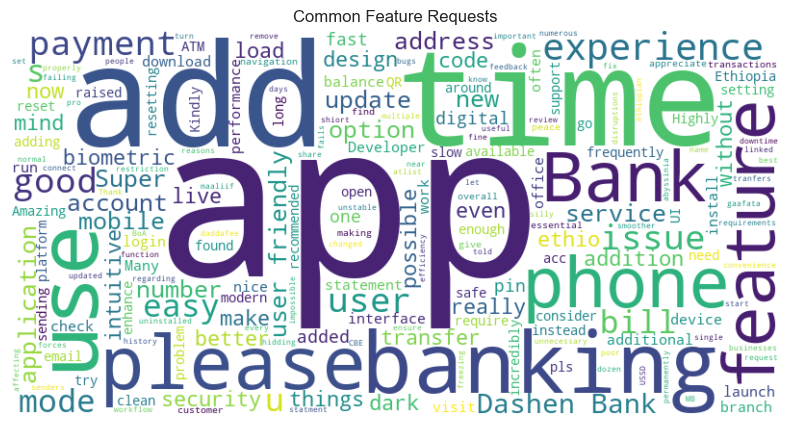

In [5]:
# Filter for feature requests (keywords: "add", "wish", "feature", "fingerprint", "option")
features = df[df['review'].str.contains("add|should have|fingerprint|biometric|dark mode", case=False, na=False)]

# Check which bank gets the most feature requests
print(features['bank'].value_counts())

# Generate a Word Cloud for Feature Requests
text = " ".join(review for review in features.review.astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Feature Requests")
plt.show()

 ## Managing Complaints (Clustering)
The prompt asks: "Cluster and track complaints (e.g., login error)."

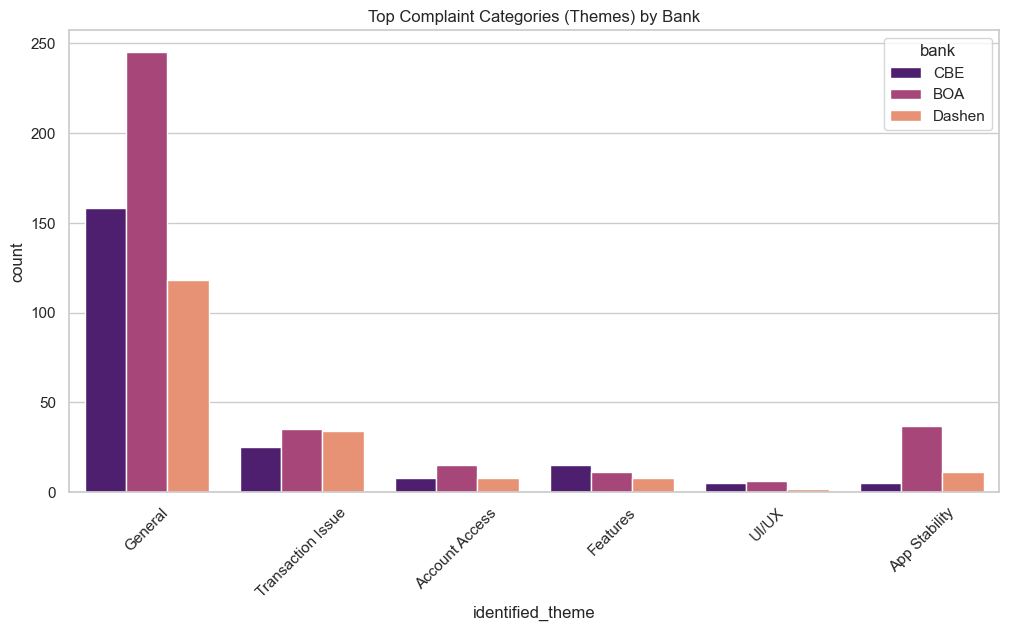

Top Issues for BOA:
identified_theme
General              245
App Stability         37
Transaction Issue     35
Account Access        15
Features              11
UI/UX                  6
Name: count, dtype: int64


In [6]:
# Filter for NEGATIVE reviews only
neg_df = df[df['sentiment_label'] == 'NEGATIVE']

# Plot the 'Identified Themes' we created in Task 2
plt.figure(figsize=(12, 6))
sns.countplot(data=neg_df, x='identified_theme', hue='bank', palette='magma')
plt.title("Top Complaint Categories (Themes) by Bank")
plt.xticks(rotation=45)
plt.show()

# Drill down: What is the main issue for the worst performing bank?
print("Top Issues for BOA:")
print(neg_df[neg_df['bank'] == 'BOA']['identified_theme'].value_counts())